# Finetune your Neural Network and save it

🎯 **Goals of this challenge**
    
1. ⚙️ **Finetune the optimizer** of a neural network
2. 💾 **Save**/**Load** a trained neural network

👩🏻‍🏫 Now that you have solid foundations about what Neural Networks are, how to design their architecture and how to prevent them from overfitting, let's take a closer look at the **`.compile(loss = ..., metrics = ..., activation = ...)`** part.

## (0) The Boston Housing Dataset

📚 ***Tensorflow.Keras*** has several built-in datasets that you can find [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets)

🏠 Among them, we are going to use the **`Boston Housing Dataset`**:
- our mission is to ***predict the values of the houses in USD (thousands)***
- and we will measure the performance of our models using the _Mean Absolute Error (MAE)_ metrics.

In [8]:
# Data manipulation
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler

### (0.1) Loading the dataset

In [2]:
# The Boston Housing Dataset from Keras
from tensorflow.keras.datasets import boston_housing

In [3]:
# Loading the dataset:
(X_train, y_train), (X_test, y_test) = boston_housing.load_data()

57026/57026 [==============================] - 0s 0us/step


In [4]:
# Shape of the dataset: 
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((404, 13), (404,)), ((102, 13), (102,)))

### (0.2) Quick glance at the target

<AxesSubplot:ylabel='Count'>

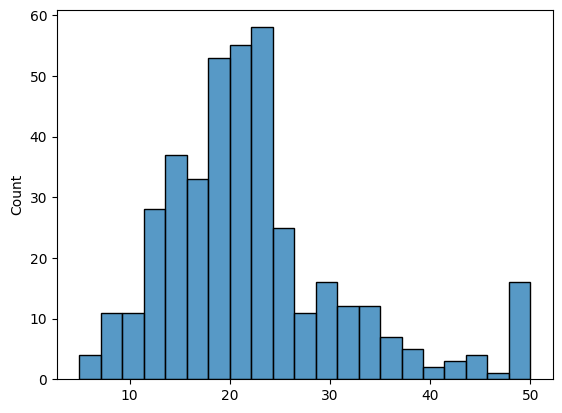

In [5]:
# Distribution of the houses' prices in the training set
sns.histplot(y_train)

In [6]:
# Null values and types of each feature:
pd.DataFrame(X_train).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [7]:
# Statistics about the numerical columns
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.745111,11.480198,11.104431,0.061881,0.557356,6.267082,69.010644,3.740271,9.440594,405.898515,18.475990,354.783168,12.740817
std,9.240734,23.767711,6.811308,0.241238,0.117293,0.709788,27.940665,2.030215,8.698360,166.374543,2.200382,94.111148,7.254545
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,188.000000,12.600000,0.320000,1.730000
25%,0.081437,0.000000,5.130000,0.000000,0.453000,5.874750,45.475000,2.077100,4.000000,279.000000,17.225000,374.672500,6.890000
50%,0.268880,0.000000,9.690000,0.000000,0.538000,6.198500,78.500000,3.142300,5.000000,330.000000,19.100000,391.250000,11.395000
75%,3.674808,12.500000,18.100000,0.000000,0.631000,6.609000,94.100000,5.118000,24.000000,666.000000,20.200000,396.157500,17.092500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.725000,100.000000,10.710300,24.000000,711.000000,22.000000,396.900000,37.970000


### (0.3) Minimal data preprocessing

👉 Here, we don't have any duplicates or missing values. Let's do the strict minimum of data preprocessing, _i.e._ ***scaling** and move on quickly to the modeling phase.

❓ **Question: scaling your features** ❓ 

Standardize `X_train` and `X_test`.

In [224]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [225]:
pd.DataFrame(X_train).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,-0.272246,-0.483615,-0.435762,-0.256833,-0.165227,-0.176443,0.813062,0.116698,-0.626249,-0.595170,1.148500,0.448077,0.825220
1,-0.403427,2.991784,-1.333912,-0.256833,-1.215182,1.894346,-1.910361,1.247585,-0.856463,-0.348433,-1.718189,0.431906,-1.329202
2,0.124940,-0.483615,1.028326,-0.256833,0.628642,-1.829688,1.110488,-1.187439,1.675886,1.565287,0.784476,0.220617,-1.308500
3,-0.401494,-0.483615,-0.869402,-0.256833,-0.361560,-0.324558,-1.236672,1.107180,-0.511142,-1.094663,0.784476,0.448077,-0.652926
4,-0.005634,-0.483615,1.028326,-0.256833,1.328612,0.153642,0.694808,-0.578572,1.675886,1.565287,0.784476,0.389882,0.263497


### (0.4) Baseline Model


🧑🏻‍🏫 In a regression task, **the baseline model always predicts the average value of `y_train`**

<details>
    <summary><i>Really? </i></summary>
    
* 🐒 Yes in most cases...! we also like to call it _"dumbest model"_ but _"baseline model"_ is more correct politically speaking :)
* ❗️ Be aware that this is not the only possible way of building a baseline model.
* 💹 ***In Time Series, the baseline model consists in predicting the last seen value***

❓ **Question: what would be the performance of the baseline model here ?** ❓ 

Before running any Machine Learning algorithm or advanced Deep Learning Neural Networks, it would be great to establish a benchmark score that you are supposed to beat. Otherwise, what is the point of running a fancy algorithm if you cannot beat this benchmark score on the test set. (other than showing off)? 

* Compute the Mean Absolute Error on the test set using a _dumb prediction_ of the mean value of `y_train` computed on the train set.

In [226]:
mean_val = y_train.mean()
y_pred = np.full((102,1),mean_val.round(2))
y_pred

array([[22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22.4],
       [22

In [227]:
from sklearn.metrics import mean_absolute_error

mean_absolute_error_test_baseline = mean_absolute_error(y_test,y_pred)
mean_absolute_error_test_baseline

6.533333333333334

## (1) The Neural Network

❓ **Question: initializing a Neural Network with a specific architecture** ❓

Write a function **`initialize_model`** that generates a Neural Network with 3 layers: 
- Input layer: 10 neurons, _"relu"_ activation function, and an the appropriate input dimension
- Hidden layer: 7 neurons and the _"relu"_ activation function
- Predictive layer: an appropriate layer corresponding to the problem we are trying to solve

In [233]:
from tensorflow.keras import models
from tensorflow.keras import layers

def initialize_model():
    
    model = models.Sequential()
    
    model.add(layers.Dense(10, activation='relu', input_dim= 13))
    model.add(layers.Dense(7, activation='relu'))
    model.add(layers.Dense(1, activation='linear'))
    
    model.compile(optimizer ='adam',
                  loss='mse',
                  metrics =['mae'])
    
    return model

❓ **Question: number of parameters** ❓

How many parameters do have in this model? 
1. Compute this number yourself
2. Double-check your answer with _model.summary()_

We already covered this question about the **number of parameters in a Fully Connected/Dense network** during **Deep Learning > 01. Fundamentals of Deep Learning** but it is always good to make sure you master the foundations of a new discipline 😉

In [234]:
model = initialize_model()

In [235]:
model.summary()

Model: "sequential_103"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_353 (Dense)           (None, 10)                140       
                                                                 
 dense_354 (Dense)           (None, 7)                 77        
                                                                 
 dense_355 (Dense)           (None, 1)                 8         
                                                                 
Total params: 225
Trainable params: 225
Non-trainable params: 0
_________________________________________________________________


<details>
    <summary><i>Answer</i></summary>
    
* Each house has `X_train.shape[-1]` = 13 features
* Remember that a neuron is a linear regression combined with an activation function so we will have 13 weights and 1 bias

1. First layer : 10 neurons $\times$ (13 weights + 1 bias ) = 140 params
2. Second layer : 7 neurons $\times$ (10 weights + 1 bias ) = 77 params
3. Third layer : 1 neuron $\times$ (7 weights + 1 bias) = 8 params
    
    
</details>

## (2) The optimizer



❓ **Question about the compiling method** ❓ 

Write a function that:
* takes _both_ a _model_ and an _optimizer_ as arguments,
* ***compiles*** the model,
* and returns the compiled model.

Please select wisely:
* the _loss function_ to be optimized 
* and  the _metrics_ on which the model should be evaluated.

In [236]:
def compile_model(model, optimizer_name):
    
    model.compile(optimizer = optimizer_name,
                  loss=['mse'],
                  metrics =['mae'])
    
    return model

❓ **Question: evaluating the model** ❓ 

- Initialize the model and compile it with the `adam` optimizer 
- Fit it on the training data. 
- Evaluate your model on the test data.

Don't forget to use an Early Stopping criterion to avoid overfitting 

<details>
    <summary><i>Notes</i></summary>

As we saw in the _"How to prevent overfitting" challenge_,  you could also use L2 penalties and Dropout Layers to prevent overfitting but:
1. _Early Stopping is the easiest and quickest code to implement, you just declare _es = EarlyStopping(...)_ and you call it back in the _.fit()_ _
2. _The main goal of this challenge is to understand the impact of the optimizer_, so stay focused 😉
    
</details>

In [237]:
from tensorflow.keras.callbacks import EarlyStopping

model = initialize_model()

model = compile_model(model,'adam')

es = EarlyStopping(patience=30, restore_best_weights= True)

history = model.fit(X_train,y_train,
          batch_size = 16,
          epochs = 1000,
          validation_split = 0.3,
          callbacks = [es])


Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 550.9534 - mae: 21.8622 - val_loss: 634.5961 - val_mae: 23.1315
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 536.4768 - mae: 21.5355 - val_loss: 618.7691 - val_mae: 22.7994
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 522.6197 - mae: 21.2189 - val_loss: 603.7911 - val_mae: 22.4811
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 509.2630 - mae: 20.9100 - val_loss: 588.6667 - val_mae: 22.1584
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 495.8356 - mae: 20.5960 - val_loss: 572.9802 - val_mae: 21.8209
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 481.4944 - mae: 20.2643 - val_loss: 556.7049 - val_mae: 21.4598
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 466.1004 - mae: 19.8955 - val_loss: 538.7036 - val_mae: 21.0566
Epoch 8/1000
18/18 [==============

In [238]:
res = model.evaluate(X_test, y_test)[1]
res

4/4 [==============================] - 0s 683us/step - loss: 17.8080 - mae: 2.7971


2.7970967292785645

❓ **Question: a Neural Network vs. a baseline** ❓ 

Compare the MAE on the test best between this Neural Network and the baseline model.

In [62]:
mae_test_baseline = mean_absolute_error_test_baseline
mae_test_neuralnet = res

print(f"The MAE on the test is {mae_test_neuralnet:.4f} for the Neural Network vs. {mae_test_baseline:.4f} for the baseline")

The MAE on the test is 2.5912 for the Neural Network vs. 6.5333 for the baseline


### (2.1) Which optimizer is the best ? 



❓ **Question: trying out different optimizers...** ❓ 

Re-run the same model,  on the same data, but using different optimizers (in a `for` loop). 

For each optimizer:
- 📉 Plot the history of the Loss (MSE) and the Metrics (MAE)
    - 🎁 We coded two functions `plot_loss_mae` and `plot_loss_mse`. Which one should you use? Feel free to use it.
- ✍️ Report the corresponding Mean Absolute Error
- ⏳ Compute the time your Neural Net needed to fit the training set

📚 [**tensorflow/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers)

In [63]:
def plot_loss_mae(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=200)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    
    
    ax2.plot(history.history['mae'])
    ax2.plot(history.history['val_mae'])
    ax2.set_title('MAE')
    ax2.set_ylabel('MAE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=20)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

def plot_loss_mse(history):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize=(13,4))
    ax1.plot(history.history['loss'])
    ax1.plot(history.history['val_loss'])
    ax1.set_title('Model loss')
    ax1.set_ylabel('Loss')
    ax1.set_xlabel('Epoch')
    ax1.set_ylim(ymin=0, ymax=20)
    ax1.legend(['Train', 'Validation'], loc='best')
    ax1.grid(axis="x",linewidth=0.5)
    ax1.grid(axis="y",linewidth=0.5)    

    
    ax2.plot(history.history['mse'])
    ax2.plot(history.history['val_mse'])
    ax2.set_title('MSE')
    ax2.set_ylabel('MSE')
    ax2.set_xlabel('Epoch')
    ax2.set_ylim(ymin=0, ymax=200)
    ax2.legend(['Train', 'Validation'], loc='best')
    ax2.grid(axis="x",linewidth=0.5)
    ax2.grid(axis="y",linewidth=0.5)    

    plt.show()

❓ **Question: a Neural Network vs a baseline - part 2** ❓ 

Are your predictions better than the baseline model you evaluated at the beginning of the notebook?

adam
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 618.1036 - mae: 23.3018 - val_loss: 701.0574 - val_mae: 24.4806
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 601.8074 - mae: 22.9620 - val_loss: 685.9075 - val_mae: 24.1776
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 587.8224 - mae: 22.6723 - val_loss: 673.1683 - val_mae: 23.9196
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 575.7474 - mae: 22.4206 - val_loss: 662.6306 - val_mae: 23.6993
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 565.9461 - mae: 22.2082 - val_loss: 654.0983 - val_mae: 23.5171
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 557.6367 - mae: 22.0256 - val_loss: 645.8987 - val_mae: 23.3432
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 549.4478 - mae: 21.8448 - val_loss: 637.7866 - val_mae: 23.1704
Epoch 8/1000
18/18 [=========

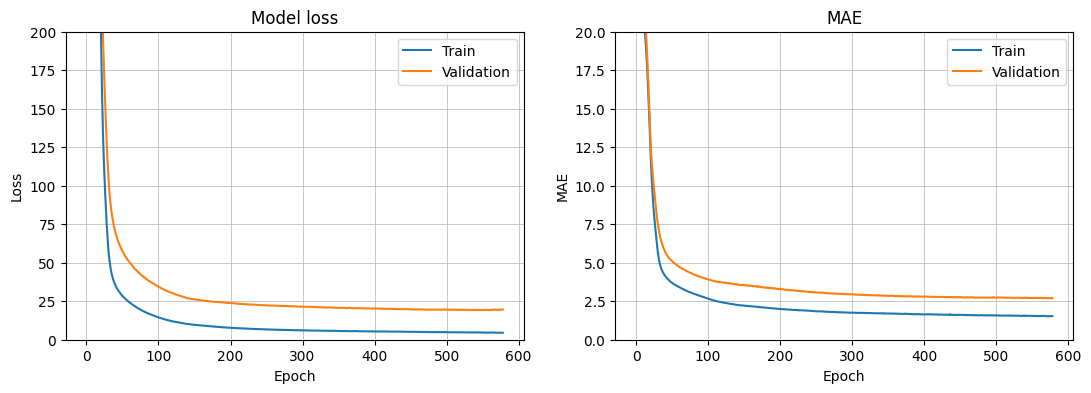

sgd
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 495.9497 - mae: 19.2196 - val_loss: 390.9516 - val_mae: 17.0459
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 143.4873 - mae: 9.7513 - val_loss: 268.9105 - val_mae: 13.4034
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 71.2677 - mae: 6.0300 - val_loss: 45.4709 - val_mae: 4.3301
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 68.7211 - mae: 6.0758 - val_loss: 69.6209 - val_mae: 5.1221
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 50.4266 - mae: 4.8463 - val_loss: 125.6065 - val_mae: 7.8852
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 35.7106 - mae: 4.2239 - val_loss: 57.2575 - val_mae: 4.6538
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 24.3111 - mae: 3.4677 - val_loss: 55.9450 - val_mae: 4.6152
Epoch 8/1000
18/18 [==============================

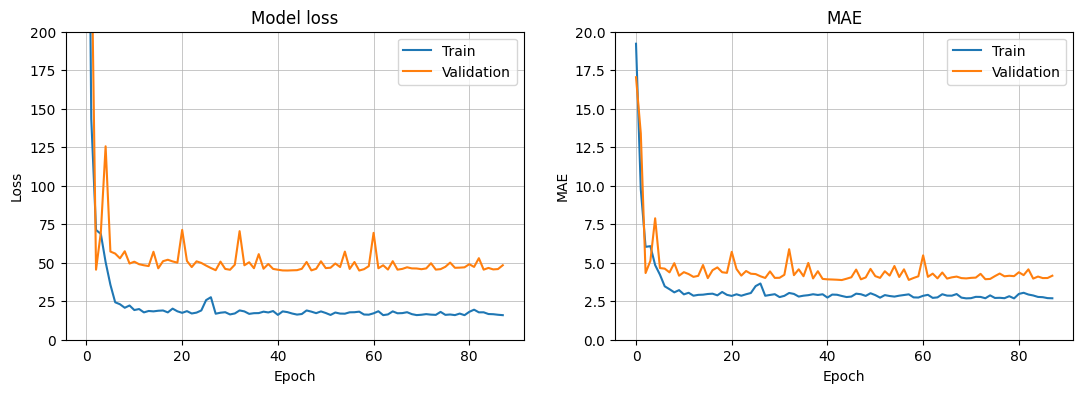

rmsprop
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 579.3643 - mae: 22.5134 - val_loss: 665.6807 - val_mae: 23.7412
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 566.8279 - mae: 22.2358 - val_loss: 654.5580 - val_mae: 23.4978
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.5691 - mae: 21.9972 - val_loss: 644.4771 - val_mae: 23.2719
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 546.9147 - mae: 21.7662 - val_loss: 634.0367 - val_mae: 23.0428
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 536.2085 - mae: 21.5182 - val_loss: 622.2158 - val_mae: 22.7871
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 524.4800 - mae: 21.2514 - val_loss: 609.6847 - val_mae: 22.5143
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 511.9863 - mae: 20.9627 - val_loss: 596.1802 - val_mae: 22.2166
Epoch 8/1000
18/18 [======

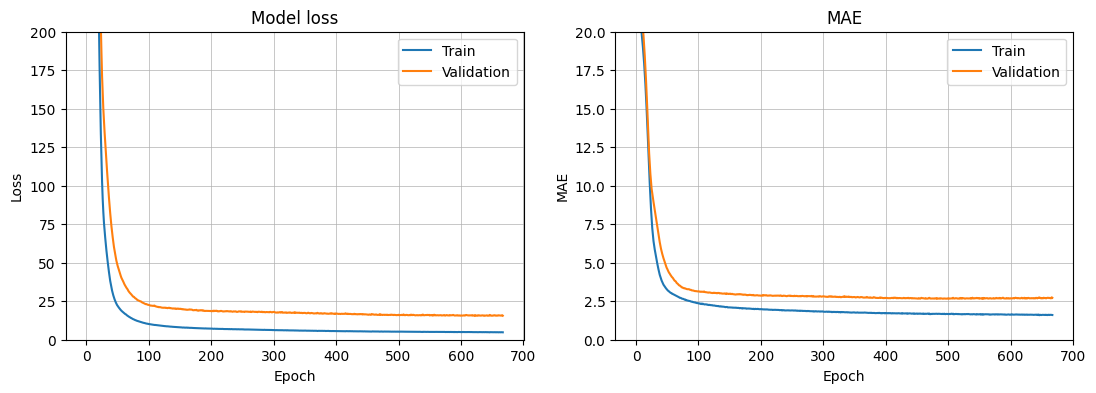

adadelta
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 556.9899 - mae: 21.7470 - val_loss: 649.7977 - val_mae: 23.2079
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.9727 - mae: 21.7465 - val_loss: 649.7800 - val_mae: 23.2075
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.9550 - mae: 21.7460 - val_loss: 649.7619 - val_mae: 23.2070
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.9373 - mae: 21.7455 - val_loss: 649.7440 - val_mae: 23.2065
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.9196 - mae: 21.7450 - val_loss: 649.7258 - val_mae: 23.2061
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.9017 - mae: 21.7445 - val_loss: 649.7076 - val_mae: 23.2056
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 556.8837 - mae: 21.7440 - val_loss: 649.6892 - val_mae: 23.2051
Epoch 8/1000
18/18 [=====

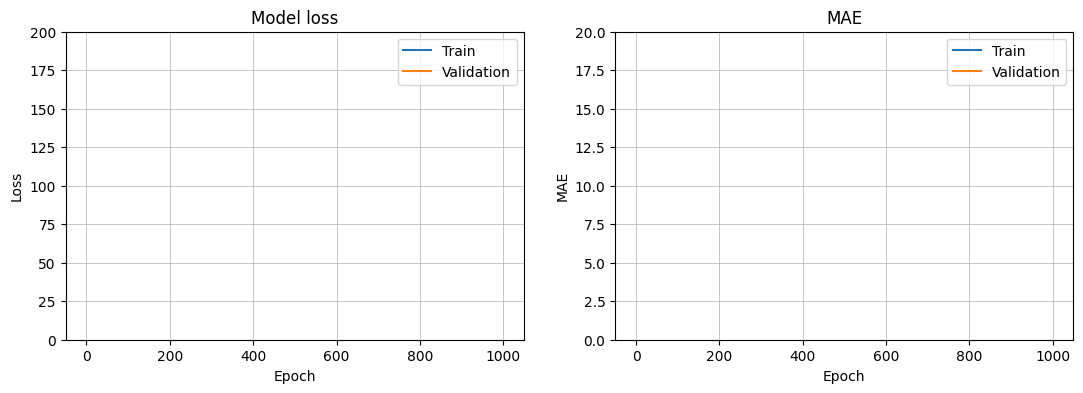

adagrad
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 511.0024 - mae: 20.7559 - val_loss: 595.1511 - val_mae: 22.1158
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 507.1119 - mae: 20.6619 - val_loss: 591.8203 - val_mae: 22.0387
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 504.4752 - mae: 20.5987 - val_loss: 589.1761 - val_mae: 21.9771
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 502.2870 - mae: 20.5452 - val_loss: 586.9408 - val_mae: 21.9251
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 500.3837 - mae: 20.4995 - val_loss: 584.9361 - val_mae: 21.8788
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 498.6573 - mae: 20.4587 - val_loss: 583.1029 - val_mae: 21.8366
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 497.0704 - mae: 20.4198 - val_loss: 581.3904 - val_mae: 21.7976
Epoch 8/1000
18/18 [======

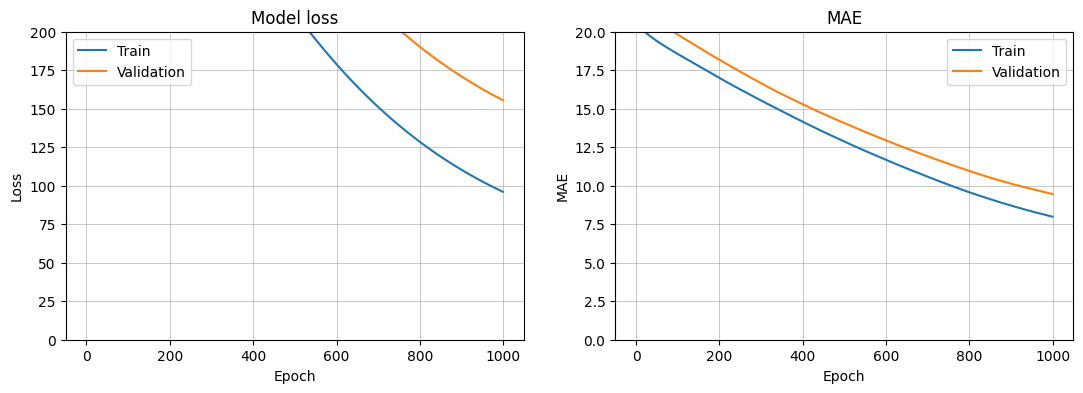

adamax
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 580.7858 - mae: 22.2963 - val_loss: 667.2535 - val_mae: 23.5597
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 571.5432 - mae: 22.0906 - val_loss: 658.7148 - val_mae: 23.3748
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 563.8933 - mae: 21.9134 - val_loss: 650.5739 - val_mae: 23.1980
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 556.5705 - mae: 21.7416 - val_loss: 642.8946 - val_mae: 23.0278
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 549.5134 - mae: 21.5750 - val_loss: 635.4375 - val_mae: 22.8575
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 542.6134 - mae: 21.4066 - val_loss: 628.2381 - val_mae: 22.6909
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 535.8319 - mae: 21.2394 - val_loss: 621.1539 - val_mae: 22.5192
Epoch 8/1000
18/18 [=======

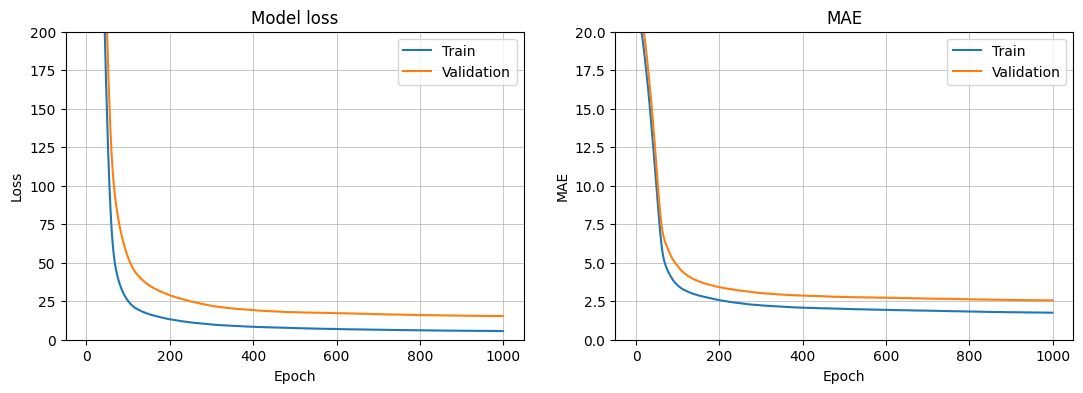

nadam
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 571.8085 - mae: 22.3880 - val_loss: 658.3310 - val_mae: 23.6402
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 560.1804 - mae: 22.1135 - val_loss: 646.2773 - val_mae: 23.3681
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 548.9853 - mae: 21.8467 - val_loss: 634.6903 - val_mae: 23.1054
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 538.1289 - mae: 21.5849 - val_loss: 623.0355 - val_mae: 22.8453
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 527.0542 - mae: 21.3223 - val_loss: 610.6290 - val_mae: 22.5734
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 514.7315 - mae: 21.0319 - val_loss: 596.6441 - val_mae: 22.2693
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 500.5423 - mae: 20.7012 - val_loss: 580.2233 - val_mae: 21.9104
Epoch 8/1000
18/18 [========

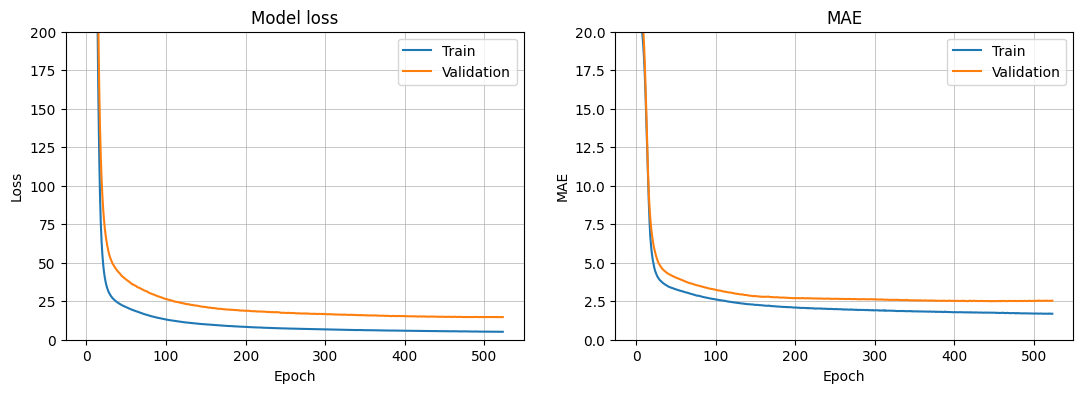

ftrl
Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 547.9374 - mae: 21.6229 - val_loss: 637.0425 - val_mae: 23.0085
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 545.0084 - mae: 21.5497 - val_loss: 634.7228 - val_mae: 22.9523
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 542.9929 - mae: 21.4989 - val_loss: 632.8895 - val_mae: 22.9083
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 541.3506 - mae: 21.4565 - val_loss: 631.2927 - val_mae: 22.8700
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 539.8875 - mae: 21.4192 - val_loss: 629.8650 - val_mae: 22.8358
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 538.5453 - mae: 21.3853 - val_loss: 628.5452 - val_mae: 22.8043
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 537.2850 - mae: 21.3537 - val_loss: 627.3108 - val_mae: 22.7750
Epoch 8/1000
18/18 [=========

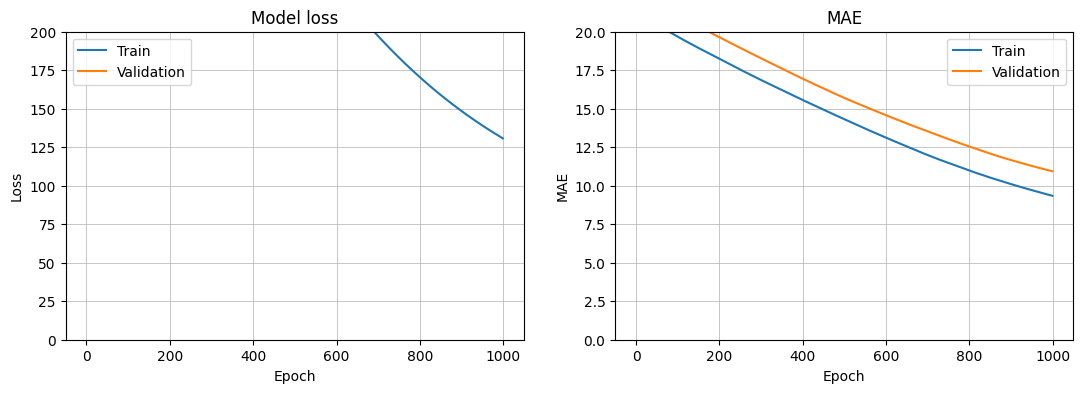

In [69]:
optimzers = ['adam','sgd','rmsprop','adadelta','adagrad','adamax','nadam','ftrl']

for optimzer in optimzers:
    print(optimzer)
    model = initialize_model()
    model = compile_model(model,optimzer)
    history = model.fit(X_train,y_train,
          batch_size = 16,
          epochs = 1000,
          validation_split = 0.3,
          callbacks = [es])
    plot_loss_mae(history)
    #plot_loss_mse(history)


<details>
    <summary><i>Answer</i></summary>
    
You can see that the Neural Network beat the baseline when using either _adam_ or _optimizer_ but it the result was worse than the baseline with the _adagrad_ optimizer.
 
    
</details>

---

👇 The advice from the Deep Learning community is the following 👇:

* 🔥 So far, our best performing optimizer is **`adam`**. Maybe a mathematician specialized in numerical methods will find a better solver in the future but for the moment..., _"adam"_ is your best friend and he/she has already been helping us achieve remarkable results.

---

❗️ So, what's next in this challenge? ❗️

👩‍🎓 Do you remember the ***Machine Learning > 04. Under The Hood*** where we coded our ***Gradient Descent*** choosing a specific ***learning rate***? It represents how slow/fast your algorithm learns. In other words, it controls the intensity of the change of the weights at each optimization of the neural network, at each backpropagation!

🚀 Well, the ***solvers in Machine Learning*** and the ***optimizers in Deep Learning*** are advanced iterative methods relying on ***hyperparameters*** and the learning rate is one of them!

🤔 How can I control this learning rate? 

✅ Instead of calling an optimizer with a string ("adam", "rmsprop", ...) which uses a default value of the learning rate, we will call 📚 [**tf/keras/optimizers**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers) objects 📚 and tailor them to our needs.

🧑🏻‍🏫 Different learning rates have different consequences, as shown here: 

<img src="learning_rate.png" alt="Learning rate" style="height:300px;"/>



### (2.2) The influence of the Learning Rate


❓ **Question: selecting an optimizer with a custom learning rate** ❓ 

📚 [**tf/keras/optimizers/Adam**](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

Instead of initializing the optimizer with a string, let's initialize an optimizer manually.

* Instantiate an Adam optimizer with a learning rate of $ \alpha = 0.1$
    * Keep the other values to their default values. 
* Use this optimizer in the `compile_model` function
* Train/Fit the model
* Plot the history
* Evaluate your model

In [75]:
from tensorflow.keras import optimizers

Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 187.0482 - mae: 10.4166 - val_loss: 94.7299 - val_mae: 7.5744
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 43.0935 - mae: 4.8809 - val_loss: 38.9398 - val_mae: 4.8279
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 21.1561 - mae: 3.5157 - val_loss: 25.1349 - val_mae: 3.6704
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 13.1640 - mae: 2.7632 - val_loss: 24.0448 - val_mae: 3.6704
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 12.5880 - mae: 2.6837 - val_loss: 20.2599 - val_mae: 3.1286
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 10.7649 - mae: 2.5026 - val_loss: 21.9889 - val_mae: 3.3644
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 11.7207 - mae: 2.5400 - val_loss: 20.1107 - val_mae: 3.2804
Epoch 8/1000
18/18 [==============================] - 0s 2ms

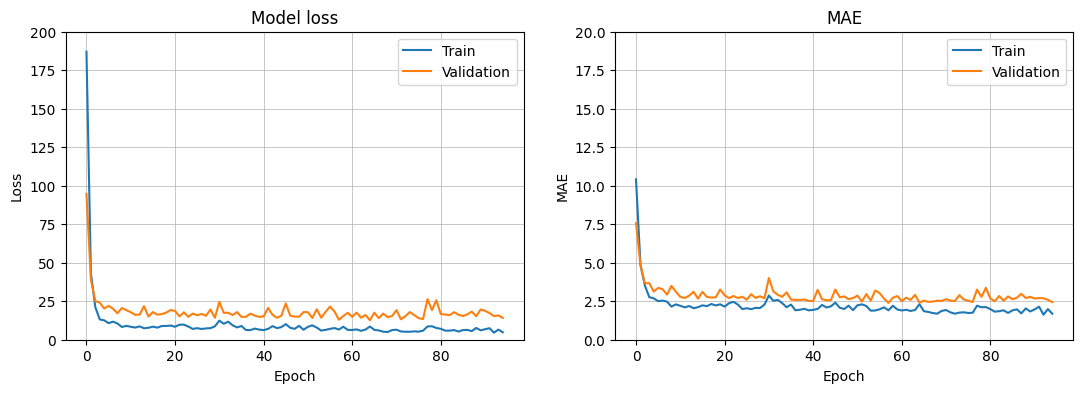

In [77]:

optimzer = optimizers.Adam(learning_rate=0.1)
model = initialize_model()
model = compile_model(model,optimzer)

history = model.fit(X_train,y_train,
          batch_size = 16,
          epochs = 1000,
          validation_split = 0.3,
          callbacks = [es])
res = model.evaluate(X_test, y_test)

print(f"The model loss is {res[0]:.2f}")
print(f"The model MAE is {res[1]:.2f}")
plot_loss_mae(history)

❓ **Question: playing with learning rates** ❓ 

Now, reproduce the same plots and results but for different learning rates.

<details>
    <summary><i>Remark</i></summary>

There is a chance that the y-axis is too large for you to visualize some results with some learning rates. In that case, feel free to re-write the plot function to plot only the epochs $> 10$.
    
</details>

Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 556.0912 - mae: 21.9088 - val_loss: 649.0649 - val_mae: 23.3347
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 555.5557 - mae: 21.8968 - val_loss: 648.5294 - val_mae: 23.3228
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 555.0380 - mae: 21.8849 - val_loss: 647.9752 - val_mae: 23.3107
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 554.4932 - mae: 21.8728 - val_loss: 647.4445 - val_mae: 23.2989
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 553.9634 - mae: 21.8608 - val_loss: 646.9011 - val_mae: 23.2869
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 553.4219 - mae: 21.8486 - val_loss: 646.3510 - val_mae: 23.2749
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 552.8721 - mae: 21.8359 - val_loss: 645.7916 - val_mae: 23.2624
Epoch 8/1000
18/18 [==============

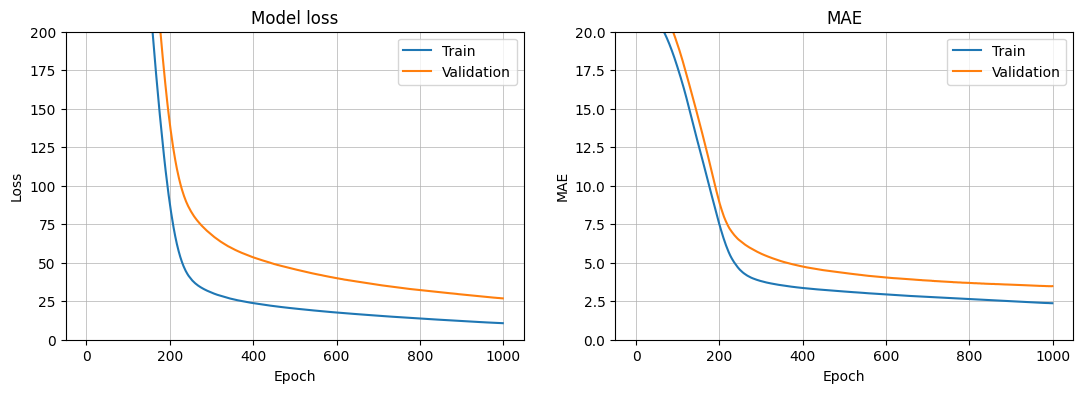

Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 535.5927 - mae: 21.2037 - val_loss: 612.6464 - val_mae: 22.3573
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 520.7750 - mae: 20.8058 - val_loss: 596.1945 - val_mae: 21.9319
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 505.2055 - mae: 20.3678 - val_loss: 578.4708 - val_mae: 21.4545
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 488.4263 - mae: 19.8870 - val_loss: 558.6042 - val_mae: 20.9055
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 469.4862 - mae: 19.3269 - val_loss: 535.9006 - val_mae: 20.2890
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 447.5488 - mae: 18.6752 - val_loss: 508.4863 - val_mae: 19.5485
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 420.3230 - mae: 17.9128 - val_loss: 476.2750 - val_mae: 18.6921
Epoch 8/1000
18/18 [==============

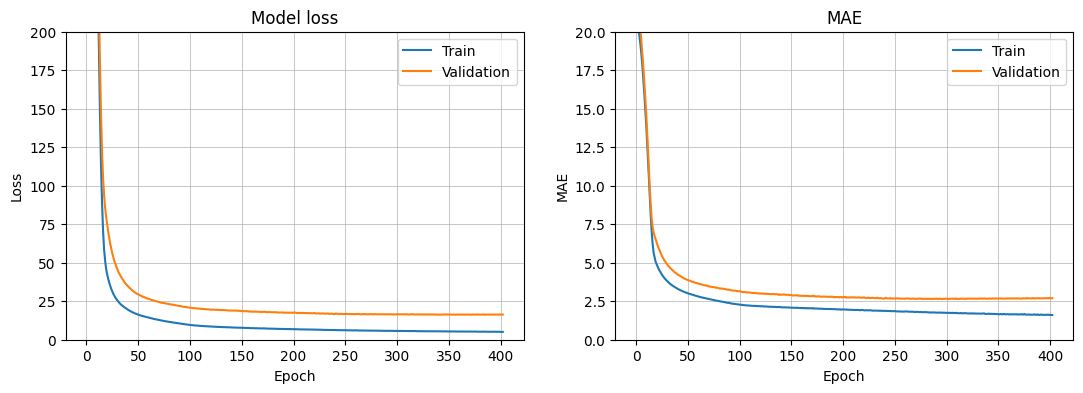

Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 483.3791 - mae: 20.1687 - val_loss: 462.3999 - val_mae: 18.9793
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 249.9673 - mae: 13.6438 - val_loss: 121.9250 - val_mae: 8.5307
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 44.5914 - mae: 5.0669 - val_loss: 56.7149 - val_mae: 5.6993
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 27.0562 - mae: 3.8192 - val_loss: 39.0394 - val_mae: 4.4423
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 21.5189 - mae: 3.3493 - val_loss: 35.4312 - val_mae: 4.2176
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 17.5603 - mae: 3.0497 - val_loss: 30.9725 - val_mae: 3.8397
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 15.9404 - mae: 2.9073 - val_loss: 29.9654 - val_mae: 3.7053
Epoch 8/1000
18/18 [==============================] - 0

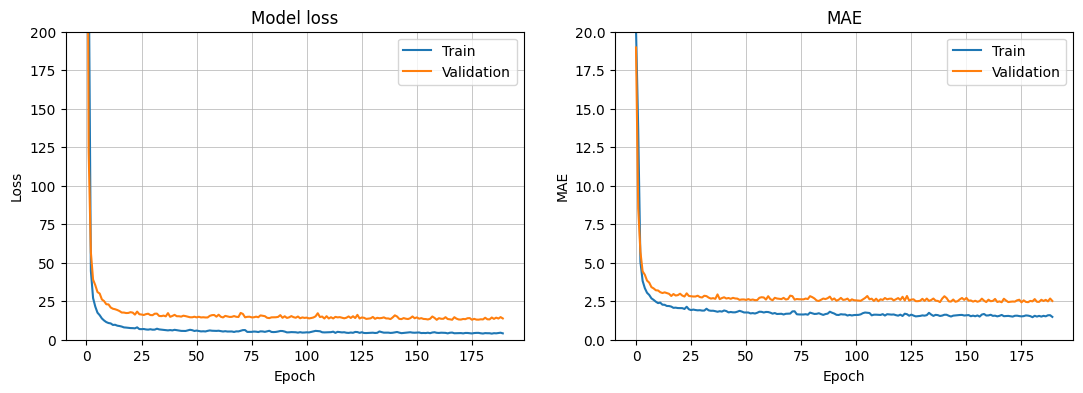

Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 235.5387 - mae: 12.4695 - val_loss: 143.5582 - val_mae: 9.5723
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 60.0866 - mae: 5.6955 - val_loss: 44.3497 - val_mae: 4.6727
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 24.9855 - mae: 3.6617 - val_loss: 30.5776 - val_mae: 3.4614
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 16.9656 - mae: 3.0503 - val_loss: 26.6137 - val_mae: 3.5355
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 13.0835 - mae: 2.6516 - val_loss: 21.6130 - val_mae: 2.9828
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 11.7416 - mae: 2.5483 - val_loss: 20.8825 - val_mae: 3.0441
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 10.0093 - mae: 2.3739 - val_loss: 19.6570 - val_mae: 2.9984
Epoch 8/1000
18/18 [==============================] - 0s 1m

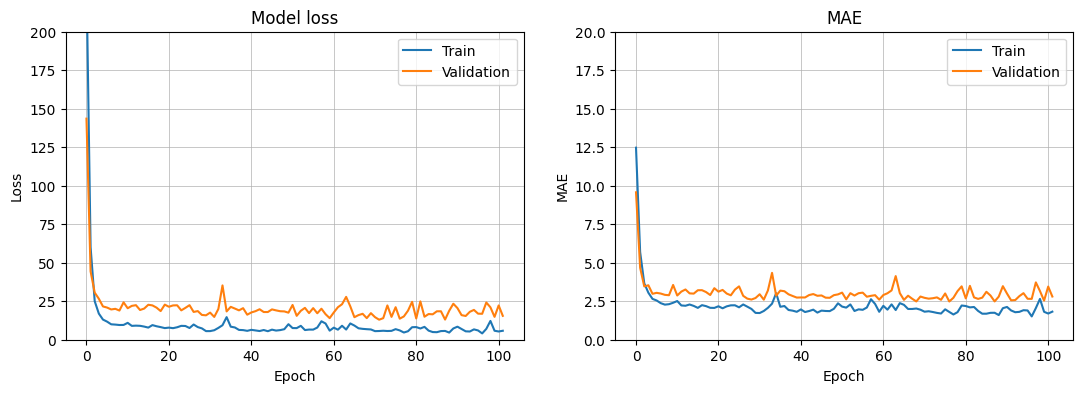

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 2170.7607 - mae: 27.1797 - val_loss: 622.6234 - val_mae: 22.7775
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 387.1208 - mae: 17.3228 - val_loss: 290.2812 - val_mae: 13.8435
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 149.5491 - mae: 9.2333 - val_loss: 139.4766 - val_mae: 8.0949
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 82.2995 - mae: 6.5067 - val_loss: 107.5907 - val_mae: 7.1755
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 76.2369 - mae: 6.3544 - val_loss: 104.9050 - val_mae: 7.2766
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 75.9908 - mae: 6.3797 - val_loss: 105.1295 - val_mae: 7.2595
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 75.8901 - mae: 6.3226 - val_loss: 106.0811 - val_mae: 7.2067
Epoch 8/1000
18/18 [===========================

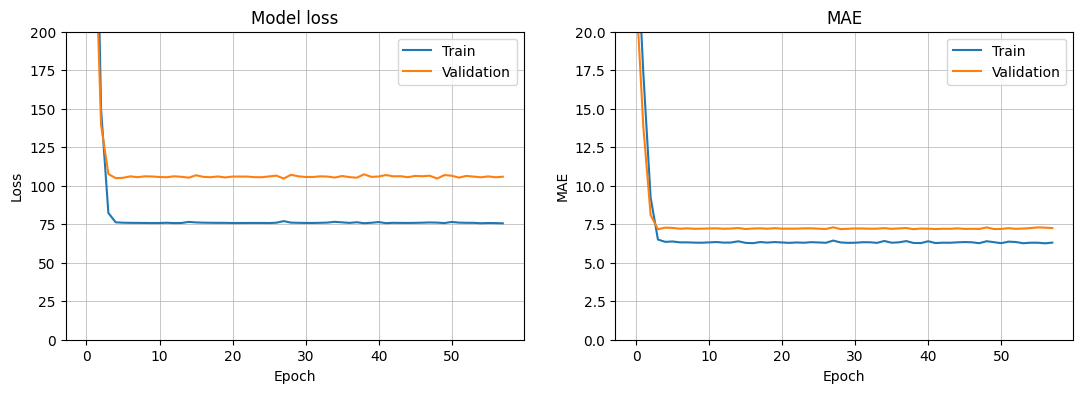

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 31360.5645 - mae: 57.2353 - val_loss: 836.9320 - val_mae: 27.0756
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 624.7394 - mae: 23.3526 - val_loss: 557.7452 - val_mae: 21.3050
Epoch 3/1000
18/18 [==============================] - 0s 2ms/step - loss: 351.7498 - mae: 16.5352 - val_loss: 300.1317 - val_mae: 14.1631
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 171.2691 - mae: 10.2201 - val_loss: 171.8566 - val_mae: 9.4792
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 101.2426 - mae: 7.2205 - val_loss: 122.7070 - val_mae: 7.4222
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 79.4514 - mae: 6.2690 - val_loss: 109.9024 - val_mae: 7.1580
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 76.3783 - mae: 6.2772 - val_loss: 106.3032 - val_mae: 7.1995
Epoch 8/1000
18/18 [=====================

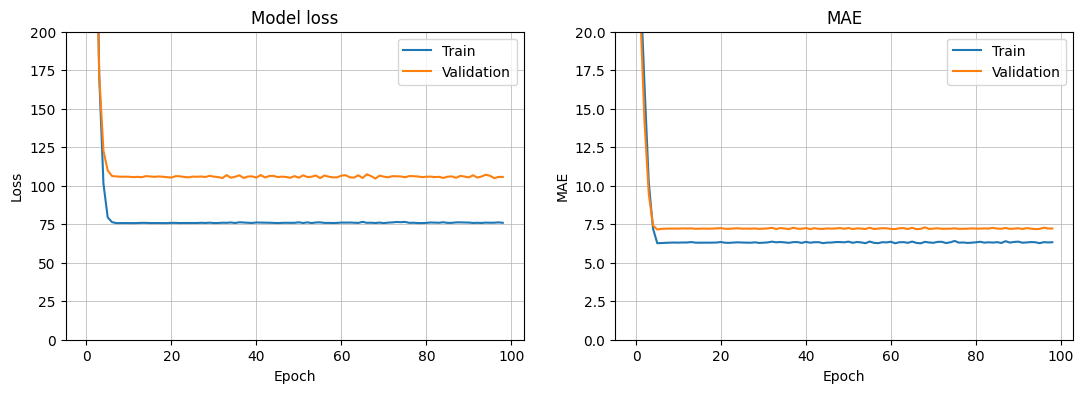

In [79]:
learning_rates = [0.0001, 0.001, 0.01, 0.1, 1, 2]
results = []

for learning_rate in learning_rates:
    optimzer = optimizers.Adam(learning_rate = learning_rate)
    model = initialize_model()
    model = compile_model(model,optimzer)

    history = model.fit(X_train,y_train,
            batch_size = 16,
            epochs = 1000,
            validation_split = 0.3,
            callbacks = [es])
    res = model.evaluate(X_test, y_test)

    print(f"The model mse on test set with learning rate {learning_rate} is {res[0]:.2f}")
    print(f"The model MAE on test set with learning rate {learning_rate} is {res[1]:.2f}")
    plot_loss_mae(history)
    
    

## (3) The loss

---

❗️ It's important to **clearly understand the difference between losses and metrics**. ❗️

* 🏋🏻‍♀️ The **loss functions** are computed ***during the training procedure***
    - For Regression tasks, the classic loss functions are: (Root) Mean Squared Error ((R)MSE), Mean Absolute Error (MAE), Mean Squared Logarithmic Error (MSLE as seen during the Kaggle Challenge)
    - For Classification tasks, the classic loss functions are: Binary Crossentropy (also known as LogLoss), the Categorical Crossentropy, the Hinge Loss, ...
* 🧑🏻‍🏫 The **metrics** are computed ***to evaluate your models, after training them***!
    - For Regression tasks, common metrics are: MSE, MAE, RMSE, Coefficient of Determination R2, ...
    - For Classification tasks, common metrics are: Accuracy, Recall, Precision, F1-Score
* 👀 Notice that some metrics can also be used as loss functions... as long as they are differentiable! (e.g. the *MSE*)

If these notions are not clear, we strongly advise to review ***Machine Learning > 03. Performance Metrics*** and ***Machine Learning > 05. Model Tuning***>

---

⏩ Alright, after this reminder, let's move on:

❓ **Question: optimizing a model with respect to a certain loss function** ❓ 

* Run the same neural network, once with the `mae` as the loss, and once with the `mse`.  
* In both case, compare `mae_train`, `mae_val`, `mse_train`, `mse_val` and conclude.

In [80]:
def compile_model(model, optimizer_name, loss_name):
    
    model.compile(optimizer = optimizer_name,
                  loss=loss_name,
                  metrics =['mae'])
    
    return model

In [81]:
model = initialize_model()
model = compile_model(model, optimzer, 'mae')
history = model.fit(X_train,y_train,
          batch_size = 16,
          epochs = 1000,
          validation_split = 0.3,
          callbacks = [es])


Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 1261.3959 - mae: 1261.3959 - val_loss: 9.5907 - val_mae: 9.5907
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.5920 - mae: 6.5920 - val_loss: 7.1820 - val_mae: 7.1820
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 6.2878 - mae: 6.2878 - val_loss: 7.3228 - val_mae: 7.3228
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 6.5979 - mae: 6.5979 - val_loss: 7.1541 - val_mae: 7.1541
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 6.7041 - mae: 6.7041 - val_loss: 7.2061 - val_mae: 7.2061
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.3528 - mae: 6.3528 - val_loss: 7.1556 - val_mae: 7.1556
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 6.4913 - mae: 6.4913 - val_loss: 7.2974 - val_mae: 7.2974
Epoch 8/1000
18/18 [==============================] - 0s 2ms/step - lo

In [82]:
model = initialize_model()
model = compile_model(model, optimzer, 'mse')
history = model.fit(X_train,y_train,
          batch_size = 16,
          epochs = 1000,
          validation_split = 0.3,
          callbacks = [es])

Epoch 1/1000
18/18 [==============================] - 0s 5ms/step - loss: 42372728.0000 - mae: 1306.7250 - val_loss: 4614.7163 - val_mae: 67.1630
Epoch 2/1000
18/18 [==============================] - 0s 1ms/step - loss: 4953.8535 - mae: 69.8364 - val_loss: 5427.2275 - val_mae: 72.9615
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 5083.8247 - mae: 70.7694 - val_loss: 5117.6826 - val_mae: 70.8085
Epoch 4/1000
18/18 [==============================] - 0s 1ms/step - loss: 4685.8657 - mae: 67.8844 - val_loss: 4658.2861 - val_mae: 67.4866
Epoch 5/1000
18/18 [==============================] - 0s 1ms/step - loss: 4239.2441 - mae: 64.5175 - val_loss: 4215.8120 - val_mae: 64.1246
Epoch 6/1000
18/18 [==============================] - 0s 1ms/step - loss: 3821.5381 - mae: 61.2008 - val_loss: 3809.6841 - val_mae: 60.8756
Epoch 7/1000
18/18 [==============================] - 0s 1ms/step - loss: 3441.1787 - mae: 58.0068 - val_loss: 3438.8674 - val_mae: 57.7497
Epoch 8/1000
1

🤔 When you work on this regression task, you want to achieve the lowest MAE in the test set at the end, right? So why wouldn't we use it directly as a loss function that would decrease with respect to the number of epochs? 

<details>
    <summary>Answer</summary>

Well, even the Deep Learning research community is still trying to answer these types of questions rigorously.
    
One thing for sure: In Deep Learning, you will never really reach the "global minimum" of the true loss function (the one computed using your entire training set as one single "batch"). So, in your first model (minimizing the MAE loss), your global MAE minimum has clearly **not** been reached (otherwise you could never beat it). 

Why? It may well be that the minimization process of the second model has performed better. Maybe because the loss function "energy map" is "smoother" or more "convex" in the case of MSE loss? Or maybe your hyper-parameters are best suited to the MSE than to the MAE loss?

</details>

## (4)  Saving and loading a trained neural network

🤯 Imagine that you trained a complex Neural Network (many layers/neurons) on a huge dataset. The parameters of your Deep Learning Model (weights and biases) are now optimized and you would like to share these weights with a teammate who wants to predict a new datapoint. Would you give this person your notebook for her/him to run it entirely and then predict the new datapoint? Hell no, we have a much better solution:
- 💾 Save the weights of the optimized neural network
- 🤝 Your friend/colleague/teammate/classmate can use them to predict a new datapoint

❓ **Question: training a good model** ❓

* Try to reach a MAE on the test set that is lower than 5 (_feel free to re-create the architecture and redefine your compiling parameters in this section!_)
    - _Remember: we are predicting house prices, so a mistake of less than 5_000 USD is already good in the real estate industry)_
    
* Whether you managed to reach it or not, move on to the question _"saving a model"_ after a few attempts.

In [245]:
model = initialize_model()
es = EarlyStopping(patience=30, restore_best_weights= True)

history = model.fit(X_train,y_train,
          batch_size = 16,
          epochs = 1000,
          validation_split = 0.3,
          callbacks = [es])

Epoch 1/1000
18/18 [==============================] - 0s 6ms/step - loss: 577.4963 - mae: 22.3516 - val_loss: 661.5562 - val_mae: 23.5760
Epoch 2/1000
18/18 [==============================] - 0s 2ms/step - loss: 563.9156 - mae: 22.0367 - val_loss: 647.8822 - val_mae: 23.2586
Epoch 3/1000
18/18 [==============================] - 0s 1ms/step - loss: 549.1623 - mae: 21.6900 - val_loss: 633.0729 - val_mae: 22.9042
Epoch 4/1000
18/18 [==============================] - 0s 2ms/step - loss: 533.2993 - mae: 21.3013 - val_loss: 616.8294 - val_mae: 22.5057
Epoch 5/1000
18/18 [==============================] - 0s 2ms/step - loss: 515.4081 - mae: 20.8672 - val_loss: 598.2941 - val_mae: 22.0383
Epoch 6/1000
18/18 [==============================] - 0s 2ms/step - loss: 495.7365 - mae: 20.3531 - val_loss: 577.1420 - val_mae: 21.5009
Epoch 7/1000
18/18 [==============================] - 0s 2ms/step - loss: 473.7560 - mae: 19.7808 - val_loss: 554.5906 - val_mae: 20.9107
Epoch 8/1000
18/18 [==============

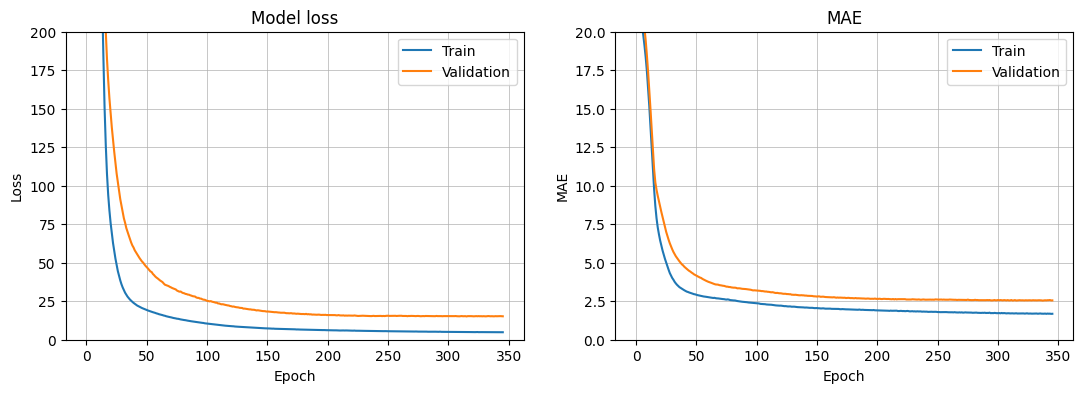

In [246]:
plot_loss_mae(history)

In [247]:
mae_test = model.evaluate(X_test, y_test)[1]
mae_test

4/4 [==============================] - 0s 677us/step - loss: 18.1540 - mae: 2.9110


2.9110121726989746

In [248]:
from nbresult import ChallengeResult
result = ChallengeResult('solution',
    mae_test = mae_test)

result.write()
print(result.check())


============================= test session starts ==============================
platform darwin -- Python 3.10.6, pytest-7.1.3, pluggy-1.0.0 -- /Users/orchidaung/.pyenv/versions/lewagon/bin/python3
cachedir: .pytest_cache
rootdir: /Users/orchidaung/code/NwayEi/data-finetune-your-neural-network/tests
plugins: asyncio-0.19.0, anyio-3.6.2
asyncio: mode=strict
collecting ... collected 1 item

test_solution.py::TestSolution::test_is_score_beat_baseline PASSED       [100%]

============================== 1 passed in 0.01s ===============================


💯 You can commit your code:

git add tests/solution.pickle

git commit -m 'Completed solution step'

git push origin master



📚 [**tf/keras/models/save_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/save_model).

❓ **Question: saving a model** ❓  

Save your model using the `.save_model(model, 'name_of_my_model')` method

In [250]:
models.save_model(model,'Housing_predict_price_model')

INFO:tensorflow:Assets written to: Housing_predict_price_model/assets


📚 [**tf/keras/models/load_model**](https://www.tensorflow.org/api_docs/python/tf/keras/models/load_model)

❓ **Question: Loading a model** ❓ 

* Load the model that you've just saved using `.load_model('name_of_your_model')` and store it into a variable called `loaded_model

* Evaluate it on the test data to check that it gives the same result as before.

In [251]:
loaded_model = models.load_model('Housing_predict_price_model')

In [252]:
loaded_model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 1ms/step - loss: 18.1540 - mae: 2.9110


[18.154043197631836, 2.9110121726989746]

## (5) (Optional) Exponential Decay

❗️ Warning ❗️ 

* This section is optional and for advanced practitioners
* The next question is not essential and can be indeed skipped as many algorithms can be run without such optimization. 

🧑🏻‍🏫 Instead of keeping a fixed learning rate, you can change it from one iteration to the other, with the intuition that at first, you need a large learning rate to learn fast, and as the neural network converges and gets closer to the minimum of the loss function, you can decrease the value of the learning rate. This is called a **`scheduler`**. 

❓ **Question: the Exponential Decay Scheduler** ❓ 

* Use the 📚 [Exponential Decay Scheduler](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/schedules/ExponentialDecay) 📚 in the `adam` optimizer
* Run it on the previous data. 

Start with the following:

```python
initial_learning_rate = 0.001 # start with default Adam value

lr_schedule = ExponentialDecay(
    # Every 5000 iterations, multiply the learning rate by 0.7
    initial_learning_rate, decay_steps = 5000, decay_rate = 0.7,
)
```

In [ ]:
X_train.shape[0]*0.7/16

In [ ]:
from tensorflow.keras.optimizers.schedules import ExponentialDecay

pass  # YOUR CODE HERE

🏁 Congratulations!

💾 Do not forget to `git add/commit/push` your notebook...

🚀 ... and move to the next challenge!

<hr>

***Further reading after your bootcamp:***

The _Boston Housing Dataset_ was deprecated by Scikit Learn for ethical reasons.

Tensorflow may also replace with in the future.

A certain M. Carlisle wrote a 12-min read article called  ["Racist Data Destruction"](https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8) to investigate this problem.